# Kickstarter projects

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from common_func import plot_decision_regions

説明変数が少なくデータ量がそこそこあれば、非線形カーネル関数を
利用してみることで予測性能が改善することがある

In [2]:
 df_ks18_fixed= pd.read_csv("./df_ks18_fixed.csv")

In [3]:
display(df_ks18_fixed.head())
df_ks18_fixed.info()
df_ks18_fixed.describe()

,Unnamed: 0,state,goal,backers
0,5,1,50000.0,224
1,6,1,1000.0,16
2,11,1,12500.0,100
3,14,1,5000.0,761
4,18,1,250.0,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331462 entries, 0 to 331461
Data columns (total 4 columns):
Unnamed: 0    331462 non-null int64
state         331462 non-null int64
goal          331462 non-null float64
backers       331462 non-null int64
dtypes: float64(1), int64(3)
memory usage: 10.1 MB


,Unnamed: 0,state,goal,backers
count,331462.000000,331462.000000,3.314620e+05,331462.000000
mean,189274.447508,0.403820,4.426583e+04,116.456315
std,109321.981860,0.490663,1.118269e+06,965.732911
min,0.000000,0.000000,1.000000e-02,0.000000
25%,94533.500000,0.000000,2.000000e+03,2.000000
50%,189372.500000,0.000000,5.000000e+03,15.000000
75%,283887.750000,1.000000,1.500000e+04,63.000000
max,378660.000000,1.000000,1.000000e+08,219382.000000


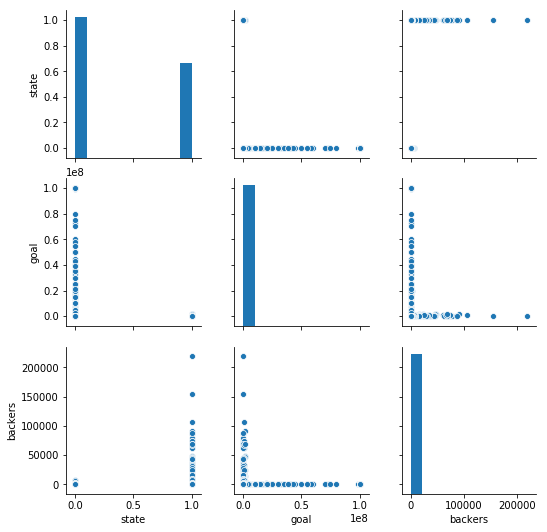

In [4]:
sns.pairplot(df_ks18_fixed[df_ks18_fixed.columns[df_ks18_fixed.columns != 'Unnamed: 0']])

In [6]:
#目的変数'state'を正解としてyに格納
y = df_ks18_fixed['state'].values
#説明変数'goal','backers'を入力としてXに格納
X = df_ks18_fixed[['goal', 'backers']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# 標準化
stdsc = StandardScaler()
X_train = stdsc.fit_transform(X_train)
X_test = stdsc.transform(X_test)

識別精度= 0.8758736511831374


In [7]:
#ロジスティック回帰で学習
clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234 , tol=1e-3)
clf.fit(X_train, y_train)
# 未知のデータを識別する
# clf.predict(X_test)
print("識別精度=",clf.score(X_test, y_test))

識別精度= 0.8456440631945212


In [ ]:
# 線形SVMの実行
C = 5
clf = SVC(C=C, kernel="linear")
clf.fit(X_train, y_train)

# 未知のデータを識別する
clf.predict(X_test)
print("識別精度=",clf.score(X_test, y_test))

* 線形分離不可能なデータを用いて、ベストなkernel,C,gammaを探してみましょう 
* 探索するパターンを増やしすぎると、計算に時間がかかるので注意してください

### カーネル関数を適応する

In [8]:
# SVMの実行
C = 5
kernel = "rbf"
gamma = 1
clf = SVC(C=C, kernel=kernel, gamma=gamma)
clf.fit(X_train, y_train)
print("識別精度=",clf.score(X_test, y_test))

識別精度= 0.8929595028107684


### ニューラルネットワーク

In [22]:
from tensorflow.compat.v1.keras import Sequential
from tensorflow.compat.v1.keras.layers import Dense, Dropout, Activation
from tensorflow.compat.v1.keras.optimizers import SGD,RMSprop, Adagrad, Adadelta, Adam

model = Sequential()
model.add(Dense(9, activation='relu', input_dim=2))
model.add(Dense(4, activation='relu', input_dim=9))
model.add(Dense(2, activation='sigmoid'))#最終層のactivationは変更しないこと

# ------ 最適化手法 ------
# sgd = SGD(lr=0.01, momentum=0.9, nesterov=False)
# rms = RMSprop(lr=0.01)
# adag = Adagrad(lr=0.01)
# adad = Adadelta(lr=0.01)
adam = Adam(lr=0.01)
# -----------------------------

model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

# WARNINGが出るが気にしなくて良い

In [26]:
# one-hotベクトルに変換
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("X_train=",X_train)
print()
print("X_test=",X_test)
print()
print("y_train=",y_train)
print()
print("y_test=",y_test)

X_train= [[-0.03832216 -0.13551191]
 [-0.0282254   0.55215896]
 [-0.03971948 -0.11600352]
 ...
 [-0.03318363 -0.016023  ]
 [-0.01740745 -0.13795046]
 [-0.02732391  0.11443938]]

X_test= [[-0.03092989 -0.00017243]
 [-0.03543737 -0.13551191]
 [-0.03955721 -0.1123457 ]
 ...
 [-0.03633887 -0.11844207]
 [-0.03769111 -0.13795046]
 [-0.03092989  0.04128291]]

y_train= [[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]

y_test= [[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]


Train on 232023 samples, validate on 99439 samples
Epoch 1/10
232023/232023 [==============================] - 22s 96us/sample - loss: 0.2556 - acc: 0.8977 - val_loss: 0.2171 - val_acc: 0.9144
Epoch 2/10
232023/232023 [==============================] - 22s 97us/sample - loss: 0.2212 - acc: 0.9110 - val_loss: 0.2484 - val_acc: 0.8978
Epoch 3/10
232023/232023 [==============================] - 21s 92us/sample - loss: 0.2171 - acc: 0.9121 - val_loss: 0.2030 - val_acc: 0.9187
Epoch 4/10
232023/232023 [==============================] - 22s 93us/sample - loss: 0.2153 - acc: 0.9130 - val_loss: 0.2022 - val_acc: 0.9186
Epoch 5/10
232023/232023 [==============================] - 22s 93us/sample - loss: 0.2135 - acc: 0.9141 - val_loss: 0.2102 - val_acc: 0.9167
Epoch 6/10
232023/232023 [==============================] - 22s 95us/sample - loss: 0.2116 - acc: 0.9146 - val_loss: 0.2037 - val_acc: 0.9200
Epoch 7/10
232023/232023 [==============================] - 22s 94us/sample - loss: 0.2110 - acc:

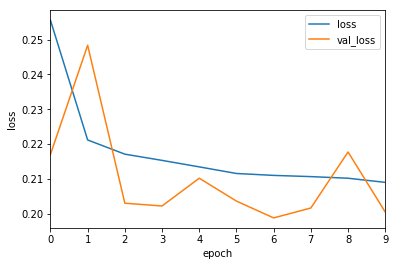

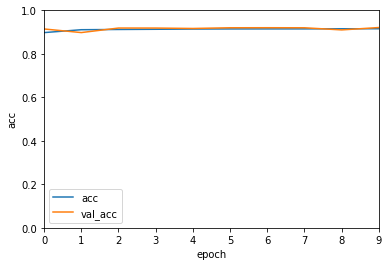

In [27]:
# 計算の実行
fit = model.fit(X_train, y_train,
          epochs=10,
          batch_size=20,validation_data=(X_test, y_test))

# 各epochにおける損失と精度をdfに入れる
df = pd.DataFrame(fit.history)

# グラフ化
df[["loss", "val_loss"]].plot()
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

df[["acc", "val_acc"]].plot()
plt.ylabel("acc")
plt.xlabel("epoch")
plt.ylim([0,1.0])
plt.show()

In [29]:
print("識別精度=",model.evaluate(X_test, y_test)[1])

99439/99439 [==============================] - 2s 23us/sample - loss: 0.2005 - acc: 0.9211
識別精度= 0.9210672
